In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_classif, chi2
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import validation_curve
from sklearn.metrics import roc_curve, auc
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import json


# Data Loading

In [3]:
# Load the dataset
df = pd.read_csv("diabetes_dataset.csv")

df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# Data Cleaning

In [4]:
# Missing value
df.isnull().sum()



Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [4]:
# Duplicated value
print("\nNumber of duplicates:", df.duplicated().sum())
df = df.drop_duplicates()


Number of duplicates: 23899


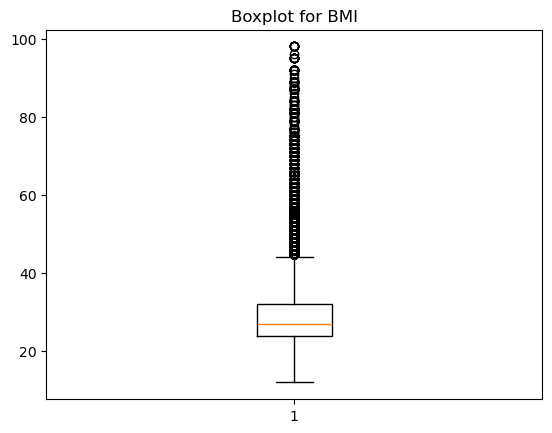

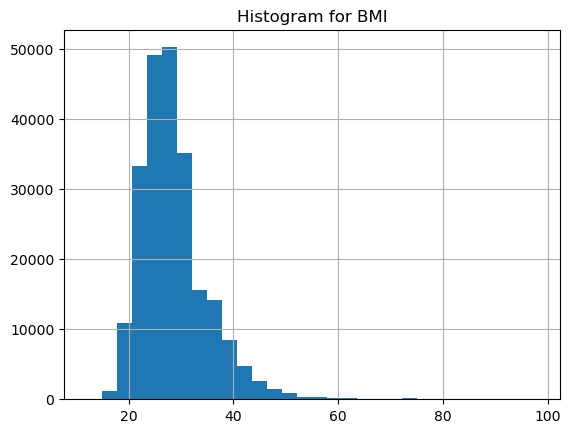

In [5]:
# Outlier
# Boxplot
plt.boxplot(df['BMI'])
plt.title("Boxplot for BMI")
plt.show()

# Histogram
df['BMI'].hist(bins=30)
plt.title("Histogram for BMI")
plt.show()


In [6]:
#Remove BMI outlier
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]
print("Number of outliers:", len(outliers))
# Keep only rows within the bounds
df2 = df[(df['BMI'] >= lower_bound) & (df['BMI'] <= upper_bound)]



Number of outliers: 5638


In [7]:
df2

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


# Data Preprocessing

In [8]:
df2['Diabetes_012'].value_counts(normalize=True)*100

Diabetes_012
0.0    83.245517
2.0    14.767804
1.0     1.986678
Name: proportion, dtype: float64

In [9]:
df2['Diabetes_012'].value_counts()

Diabetes_012
0.0    186589
2.0     33101
1.0      4453
Name: count, dtype: int64

In [10]:
# Copy df2 into df3
df3 = df2.copy()

# Replace Diabetes_012 with binary version
df3['Diabetes_012'] = df3['Diabetes_012'].apply(lambda x: 1 if x >= 1 else 0)

# Rename the column
df3.rename(columns={'Diabetes_012': 'Diabetes_binary'}, inplace=True)

# Save as new CSV
df3.to_csv("diabetes_binary.csv", index=False)

print("✅ Saved df3 with Diabetes_binary as diabetes_binary.csv")


✅ Saved df3 with Diabetes_binary as diabetes_binary.csv


In [11]:
df3

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253674,0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253676,1,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


<function matplotlib.pyplot.show(close=None, block=None)>

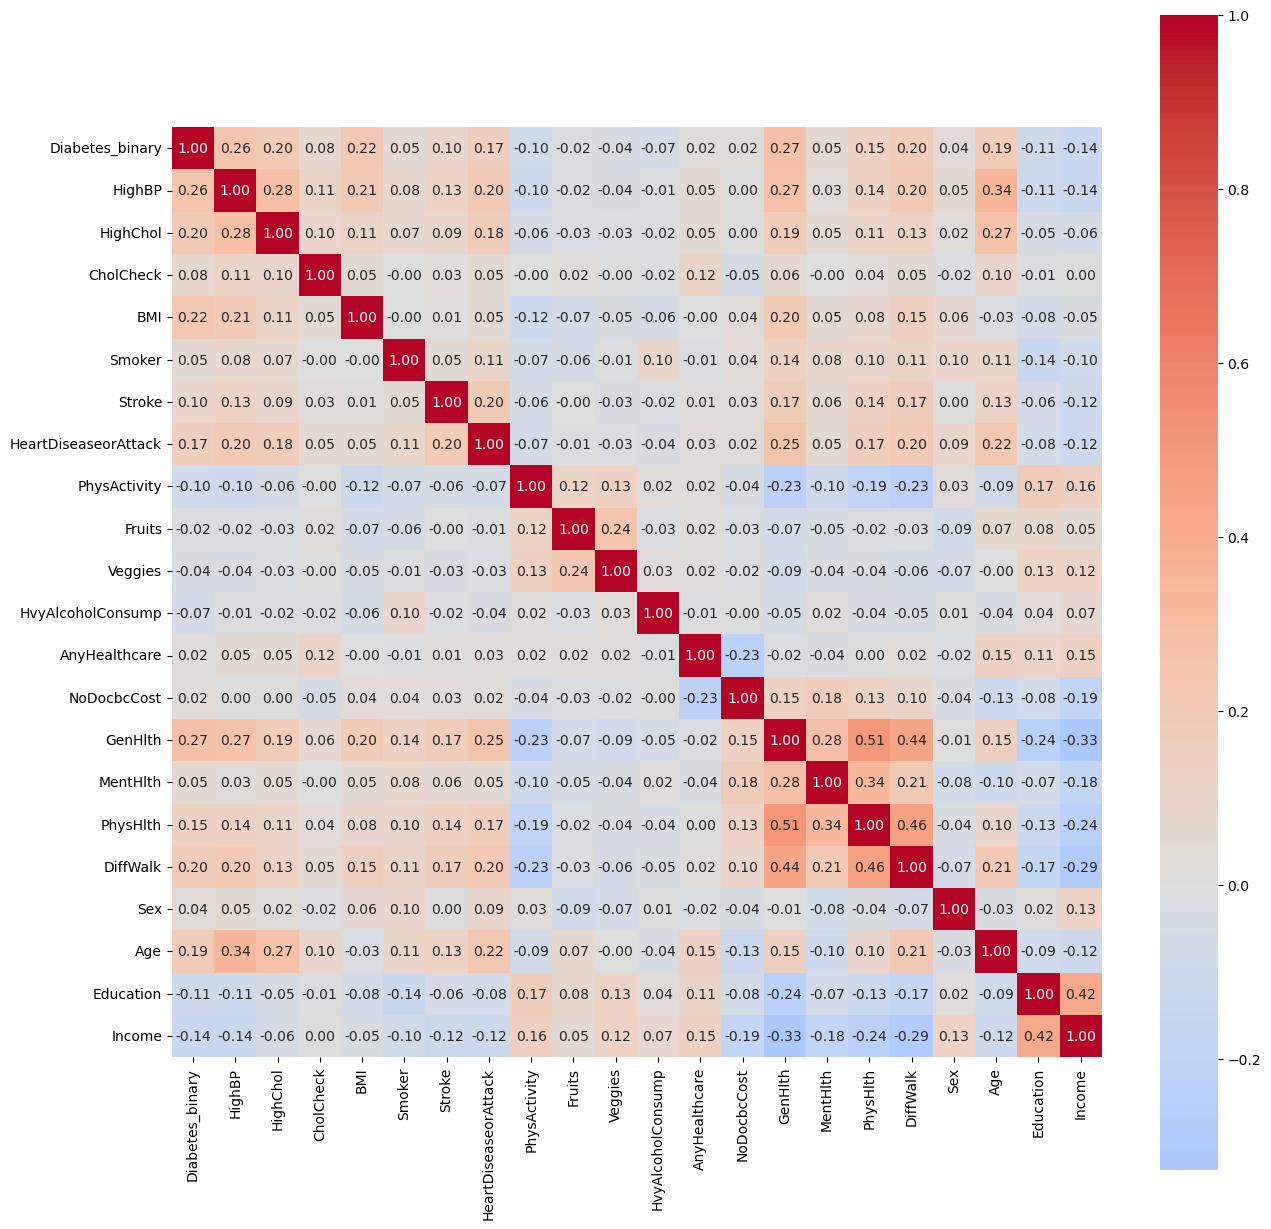

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(df3.select_dtypes(include=['int', 'float']).corr(), annot=True, center=0, cmap='coolwarm', fmt=".2f", square=True)
plt.show

In [13]:
target_corr = df3.select_dtypes(include=['int', 'float']).corr()['Diabetes_binary'].drop('Diabetes_binary')

target_corr_sorted = target_corr.abs().sort_values(ascending=False)

for feature in target_corr_sorted.index:
    print(f"{feature}: {df3.select_dtypes(include=['int', 'float']).corr().loc[feature, 'Diabetes_binary']:.3f}")

GenHlth: 0.274
HighBP: 0.256
BMI: 0.218
HighChol: 0.201
DiffWalk: 0.196
Age: 0.189
HeartDiseaseorAttack: 0.167
PhysHlth: 0.149
Income: -0.142
Education: -0.106
Stroke: 0.098
PhysActivity: -0.095
CholCheck: 0.075
HvyAlcoholConsump: -0.065
MentHlth: 0.052
Smoker: 0.047
Veggies: -0.042
Sex: 0.036
AnyHealthcare: 0.025
NoDocbcCost: 0.023
Fruits: -0.023


In [14]:
X = df3.drop(["Diabetes_binary"], axis=1)
y = df3["Diabetes_binary"]



In [16]:
# ============================================
# Correlation filter
# ============================================
corr = X.corrwith(y).abs().reset_index()
corr.columns = ["Feature", "Correlation"]

corr_keep = corr[corr["Correlation"] > 0.05]
print("\n🔹 After Correlation filter (keep > 0.05):")
print(corr_keep)

# ============================================
# VIF test
# ============================================
X_scaled = StandardScaler().fit_transform(X[corr_keep["Feature"]])
vif_data = pd.DataFrame()
vif_data["Feature"] = corr_keep["Feature"]
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

vif_keep = vif_data[vif_data["VIF"] < 10]
print("\n🔹 After VIF filter (keep < 10):")
print(vif_keep)

# ============================================
# ANOVA test
# ============================================
f_vals, p_vals = f_classif(X[vif_keep["Feature"]], y)
anova_df = pd.DataFrame({"Feature": vif_keep["Feature"], "ANOVA_p": p_vals})

anova_keep = anova_df[anova_df["ANOVA_p"] < 0.05]
print("\n🔹 After ANOVA filter (p < 0.05):")
print(anova_keep)

# ============================================
# Chi-Square test
# ============================================
X_nonneg = MinMaxScaler().fit_transform(X[anova_keep["Feature"]])
chi2_vals, chi2_p = chi2(X_nonneg, y)
chi2_df = pd.DataFrame({"Feature": anova_keep["Feature"], "Chi2_p": chi2_p})

chi_keep = chi2_df[chi2_df["Chi2_p"] < 0.05]
print("\n🔹 After Chi-Square filter (p < 0.05):")
print(chi_keep)

# ============================================
# Final selected features
# ============================================
selected_features = chi_keep["Feature"].tolist()
print("\n✅ Final Selected Features:", selected_features)

# ============================================
# RandomForest feature importance
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features], y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

importance_df = pd.DataFrame({
    "Feature": selected_features,
    "RF_Importance": rf.feature_importances_
}).sort_values("RF_Importance", ascending=False)

print("\n🌲 RandomForest Feature Importance:")
print(importance_df)



🔹 After Correlation filter (keep > 0.05):
                 Feature  Correlation
0                 HighBP     0.255507
1               HighChol     0.201449
2              CholCheck     0.075147
3                    BMI     0.217899
5                 Stroke     0.097560
6   HeartDiseaseorAttack     0.166839
7           PhysActivity     0.095056
10     HvyAlcoholConsump     0.065039
13               GenHlth     0.274453
14              MentHlth     0.051797
15              PhysHlth     0.149214
16              DiffWalk     0.196136
18                   Age     0.189174
19             Education     0.105782
20                Income     0.141593

🔹 After VIF filter (keep < 10):
                 Feature       VIF
0                 HighBP  1.302659
1               HighChol  1.158099
2              CholCheck  1.022744
3                    BMI  1.113705
5                 Stroke  1.077600
6   HeartDiseaseorAttack  1.152322
7           PhysActivity  1.103569
10     HvyAlcoholConsump  1.012624
1

In [17]:

df4 = df3[[
    "Diabetes_binary",  # Target variable
    "BMI", 
    "Age", 
    "Income", 
    "PhysHlth", 
    "Education", 
    "MentHlth", 
    "GenHlth", 
    "HighBP", 
    "PhysActivity", 
    "HighChol", 
    "DiffWalk", 
    "HeartDiseaseorAttack", 
    "Stroke", 
    "HvyAlcoholConsump", 
    "CholCheck"
]]

# Verify the new dataframe
print("df4 shape:", df4.shape)
print("\nColumns in df4:")
print(df4.columns.tolist())
print("\nFirst 5 rows of df4:")
print(df4.head())
print(f"\nTotal patients in df4: {len(df4)}")

# Check for any missing values
print("\nMissing values in each column:")
print(df4.isnull().sum())

# Verify the target variable distribution
print("\nDiabetes_binary distribution in df4:")
print(df4['Diabetes_binary'].value_counts())
print(f"Percentage with diabetes: {df4['Diabetes_binary'].mean():.1%}")

df4.to_csv('diabetes_cleaned_dataset.csv', index=False)
print("df4 saved to 'diabetes_cleaned_dataset.csv'")

df4 shape: (224143, 16)

Columns in df4:
['Diabetes_binary', 'BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'MentHlth', 'GenHlth', 'HighBP', 'PhysActivity', 'HighChol', 'DiffWalk', 'HeartDiseaseorAttack', 'Stroke', 'HvyAlcoholConsump', 'CholCheck']

First 5 rows of df4:
   Diabetes_binary   BMI   Age  Income  PhysHlth  Education  MentHlth  \
0                0  40.0   9.0     3.0      15.0        4.0      18.0   
1                0  25.0   7.0     1.0       0.0        6.0       0.0   
2                0  28.0   9.0     8.0      30.0        4.0      30.0   
3                0  27.0  11.0     6.0       0.0        3.0       0.0   
4                0  24.0  11.0     4.0       0.0        5.0       3.0   

   GenHlth  HighBP  PhysActivity  HighChol  DiffWalk  HeartDiseaseorAttack  \
0      5.0     1.0           0.0       1.0       1.0                   0.0   
1      3.0     0.0           1.0       0.0       0.0                   0.0   
2      5.0     1.0           0.0       1.0       1.0  

In [18]:
X = df4[[
    "BMI", "Age", "Income", "PhysHlth", "Education", 
    "MentHlth", "GenHlth", "HighBP", "PhysActivity", 
    "HighChol", "DiffWalk", "HeartDiseaseorAttack", 
    "Stroke", "HvyAlcoholConsump", "CholCheck"
]]


# Data resample

In [19]:
y.value_counts()

Diabetes_binary
0    186589
1     37554
Name: count, dtype: int64

In [20]:
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm = nm.fit_resample(X,y)
y_sm.shape , x_sm.shape

((75108,), (75108, 15))

In [21]:
y_sm.value_counts()

Diabetes_binary
0    37554
1    37554
Name: count, dtype: int64

## Training and Testing

In [22]:
# Identify which features are categorical (encoded as integers but represent categories)
categorical_features = ['Age', 'Education', 'Income', 'GenHlth']  # These are likely categorical
# Note: Features like HighBP, HighChol etc. are binary (0/1) and can stay as-is

# Create a copy for preprocessing
X_processed = x_sm.copy()

# Convert categorical features to proper categorical data type
for feature in categorical_features:
    X_processed[feature] = X_processed[feature].astype('category')

# Now split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_sm, test_size=0.2, random_state=42, stratify=y_sm
)

# Modelling

## Random Forest


Training + Prediction time: 2.41 seconds
Accuracy: 0.821328717880442

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      7511
           1       0.85      0.77      0.81      7511

    accuracy                           0.82     15022
   macro avg       0.82      0.82      0.82     15022
weighted avg       0.82      0.82      0.82     15022

Confusion matrix: [[6521  990]
 [1694 5817]]


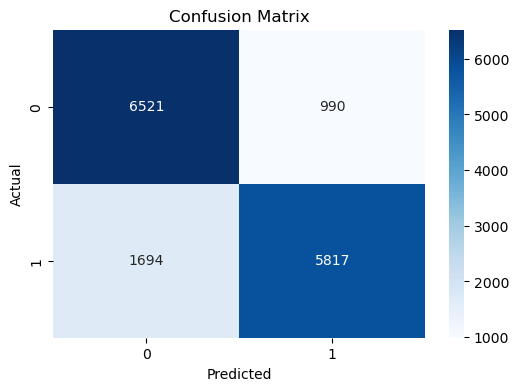

In [24]:
rf_model = RandomForestClassifier(
    n_estimators=200,      
    max_depth=None,        
    min_samples_split=2,  
    min_samples_leaf=1,    
    random_state=42,
    n_jobs=-1              
)

start_time = time.time()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
end_time = time.time()

print(f"\nTraining + Prediction time: {end_time - start_time:.2f} seconds")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:",confusion_matrix(y_test, y_pred))
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



## XGBoost Classifier


Training + Prediction time: 2.13 seconds
Accuracy: 0.856610304886167

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.87      7511
           1       0.93      0.77      0.84      7511

    accuracy                           0.86     15022
   macro avg       0.87      0.86      0.86     15022
weighted avg       0.87      0.86      0.86     15022

Confusion matrix: [[7075  436]
 [1718 5793]]


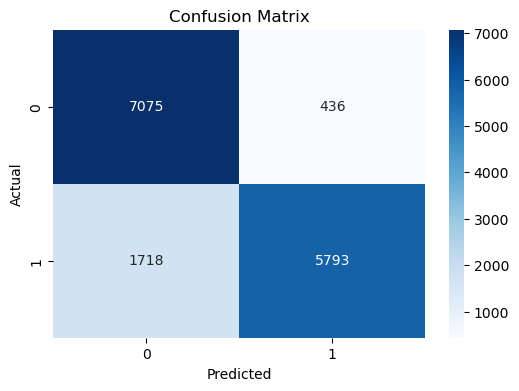

In [23]:

xgb_model = xgb.XGBClassifier(
    n_estimators=200,       
    max_depth=5,            
    learning_rate=0.1,     
    subsample=0.8,          
    colsample_bytree=0.8,   
    eval_metric="logloss",
    enable_categorical=True,   
    tree_method="hist", 
    random_state=42
)

start_time = time.time()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
end_time = time.time()

print(f"\nTraining + Prediction time: {end_time - start_time:.2f} seconds")


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:",confusion_matrix(y_test, y_pred))
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Validation Curve to check parameter

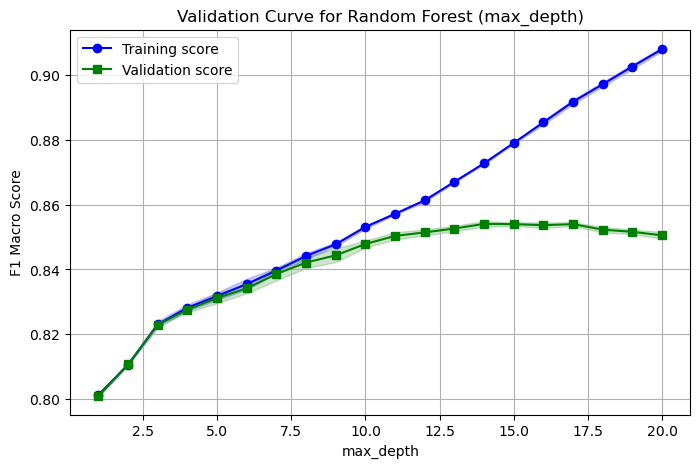

In [26]:

param_range = np.arange(1, 21)  

train_scores, val_scores = validation_curve(
    RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    X_train, y_train,
    param_name="max_depth",
    param_range=param_range,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1
)

# Calculate mean and std for each range
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8,5))
plt.plot(param_range, train_mean, label="Training score", color="blue", marker="o")
plt.fill_between(param_range, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")

plt.plot(param_range, val_mean, label="Validation score", color="green", marker="s")
plt.fill_between(param_range, val_mean-val_std, val_mean+val_std, alpha=0.2, color="green")

plt.title("Validation Curve for Random Forest (max_depth)")
plt.xlabel("max_depth")
plt.ylabel("F1 Macro Score")
plt.legend(loc="best")
plt.grid()
plt.show()


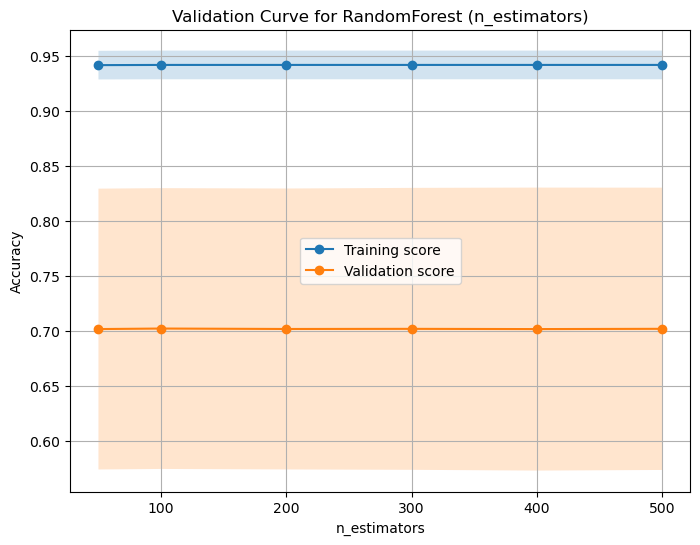

In [27]:

n_estimators_range = [50, 100, 200, 300, 400, 500]

train_scores, val_scores = validation_curve(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    x_sm, y_sm,
    param_name="n_estimators",
    param_range=n_estimators_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)


plt.figure(figsize=(8,6))
plt.plot(n_estimators_range, train_mean, label="Training score", marker='o')
plt.plot(n_estimators_range, val_mean, label="Validation score", marker='o')

plt.fill_between(n_estimators_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(n_estimators_range, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.title("Validation Curve for RandomForest (n_estimators)")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


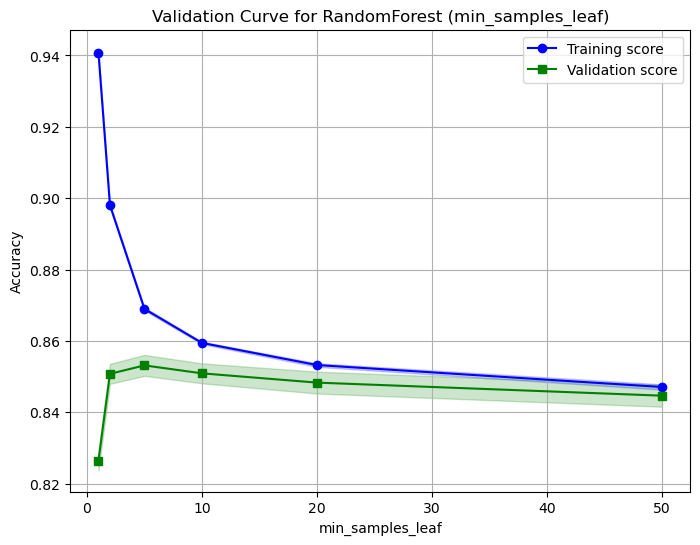

In [28]:

# Range of min_samples_leaf values to test
param_range = [1, 2, 5, 10, 20, 50]

# Validation curve
train_scores, val_scores = validation_curve(
    RandomForestClassifier(
        n_estimators=200,       # keep fixed
        max_depth=None,         # or set your chosen depth
        random_state=42,
        n_jobs=-1
    ),
    X_train, y_train,
    param_name="min_samples_leaf",
    param_range=param_range,
    cv=5,
    scoring="accuracy",   # you can switch to "f1_macro" if imbalance is strong
    n_jobs=-1
)

# Compute means and stds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(param_range, train_mean, label="Training score", color="blue", marker="o")
plt.fill_between(param_range, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")

plt.plot(param_range, val_mean, label="Validation score", color="green", marker="s")
plt.fill_between(param_range, val_mean-val_std, val_mean+val_std, alpha=0.2, color="green")

plt.title("Validation Curve for RandomForest (min_samples_leaf)")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


### Random Forest with hyperparameter tuning

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Training time: 683.08 seconds
Best parameters found: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': True}

Training Accuracy: 0.8683
Testing Accuracy:  0.8529

Accuracy on Test Set: 0.8529490081214219

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.87      7511
           1       0.94      0.75      0.84      7511

    accuracy                           0.85     15022
   macro avg       0.87      0.85      0.85     15022
weighted avg       0.87      0.85      0.85     15022



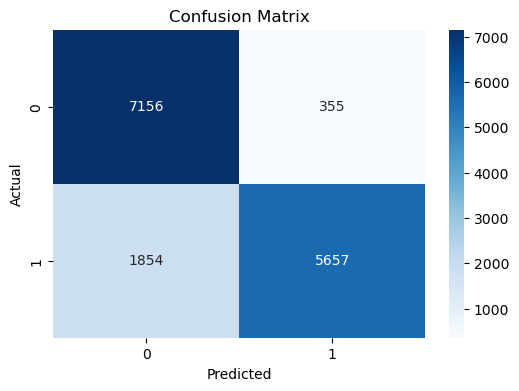


Top 15 Feature Importances:
                 Feature  Importance
3               PhysHlth    0.277945
6                GenHlth    0.164379
5               MentHlth    0.146971
10              DiffWalk    0.102088
2                 Income    0.093446
0                    BMI    0.069290
4              Education    0.030436
8           PhysActivity    0.028410
1                    Age    0.022941
11  HeartDiseaseorAttack    0.021893
7                 HighBP    0.018776
12                Stroke    0.012531
9               HighChol    0.007776
13     HvyAlcoholConsump    0.002506
14             CholCheck    0.000611


C:\Users\tange\AppData\Local\Temp\ipykernel_25456\88975384.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importances.head(15), palette="viridis")


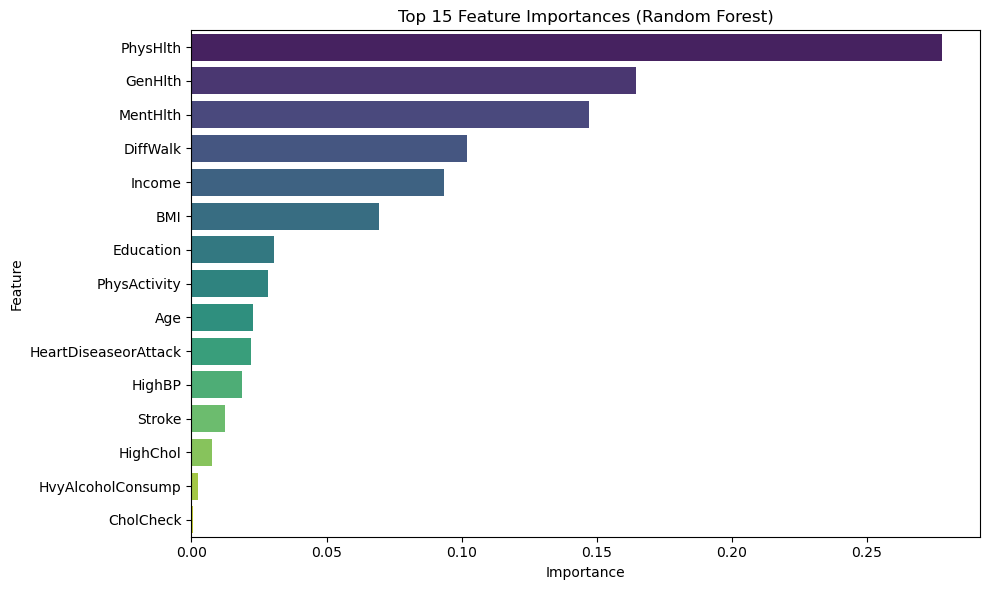

In [29]:

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [1, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 10, 20, 50],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

# =========================
# RandomizedSearchCV
# =========================
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,          
    cv=5,               
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# =========================
# Train with timing
# =========================
start_time = time.time()
rf_random.fit(X_train, y_train)
end_time = time.time()

print(f"\nTraining time: {end_time - start_time:.2f} seconds")

# =========================
# Best model & evaluation
# =========================
best_rf = rf_random.best_estimator_
print("Best parameters found:", rf_random.best_params_)

train_acc = best_rf.score(X_train, y_train)
test_acc = best_rf.score(X_test, y_test)
print(f"\nTraining Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")

y_pred = best_rf.predict(X_test)
print(f"\nAccuracy on Test Set: {accuracy_score(y_test, y_pred)}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# =========================
# Feature Importance
# =========================
importances = best_rf.feature_importances_

try:
    feature_names = X_train.columns  
except:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

feat_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nTop 15 Feature Importances:")
print(feat_importances.head(15))

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_importances.head(15), palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


### XGBoost with Hyperparameter tuning

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Training time: 392.17 seconds
Best parameters found: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.7}

Training Accuracy: 0.8706
Testing Accuracy:  0.8589

Accuracy on Test Set: 0.8588736519771003

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      7511
           1       0.93      0.77      0.85      7511

    accuracy                           0.86     15022
   macro avg       0.87      0.86      0.86     15022
weighted avg       0.87      0.86      0.86     15022



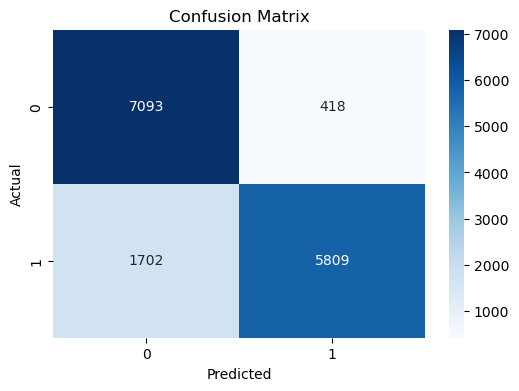


Top 15 Feature Importances:
                 Feature  Importance
3               PhysHlth    0.347550
5               MentHlth    0.171746
6                GenHlth    0.090749
10              DiffWalk    0.077272
2                 Income    0.057205
12                Stroke    0.049053
11  HeartDiseaseorAttack    0.044720
8           PhysActivity    0.039955
0                    BMI    0.028652
4              Education    0.027454
7                 HighBP    0.025956
9               HighChol    0.014396
1                    Age    0.013552
13     HvyAlcoholConsump    0.008463
14             CholCheck    0.003278


C:\Users\tange\AppData\Local\Temp\ipykernel_16836\2141124315.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importances.head(15), palette="viridis")


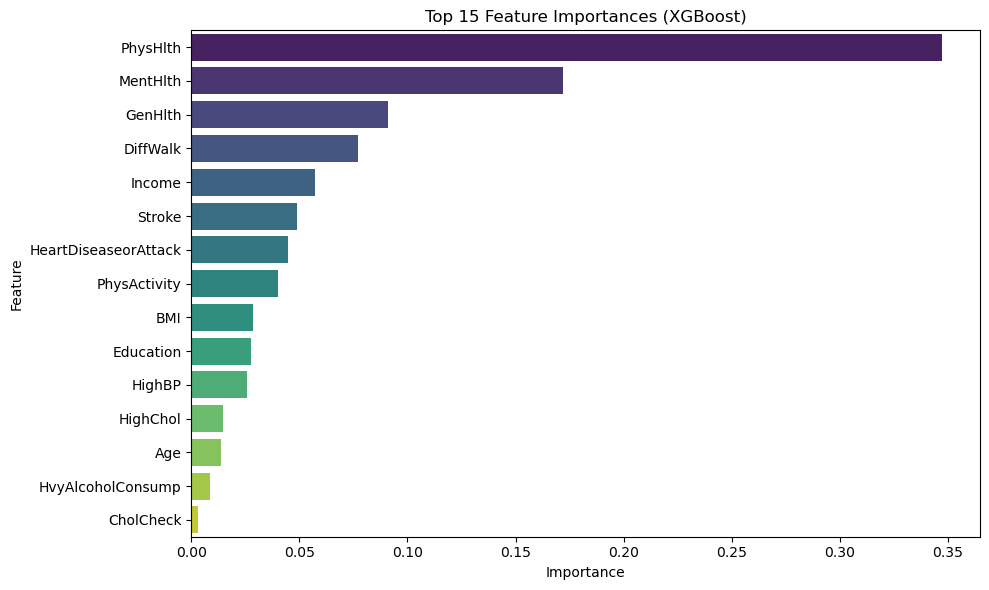

In [24]:
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [1, 4, 7, 10, 13],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "min_child_weight": [1, 3, 5, 7],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3, 0.5],
    "reg_alpha": [0, 0.01, 0.1, 0.5, 1, 5, 10],   # L1
    "reg_lambda": [0.1, 0.5, 1, 5, 10, 20] 
}

# =========================
# RandomizedSearchCV
# =========================
xgb_model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    enable_categorical=True,   
    tree_method="hist", 
    random_state=42
)

rand_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=100,
    scoring="f1",
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# =========================
# Train with timing
# =========================
start_time = time.time()
rand_search.fit(X_train, y_train)
end_time = time.time()
print(f"\nTraining time: {end_time - start_time:.2f} seconds")

# =========================
# Best model & evaluation
# =========================
best_model = rand_search.best_estimator_
print("Best parameters found:", rand_search.best_params_)

# Training vs Testing Score
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
print(f"\nTraining Accuracy: {train_score:.4f}")
print(f"Testing Accuracy:  {test_score:.4f}")

# Predictions
y_pred = best_model.predict(X_test)
print(f"\nAccuracy on Test Set: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# =========================
# Feature Importance
# =========================
importances = best_model.feature_importances_

# If you have feature names
try:
    feature_names = X_train.columns  
except:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]


feat_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nTop 15 Feature Importances:")
print(feat_importances.head(15))

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_importances.head(15), palette="viridis")
plt.title("Top 15 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

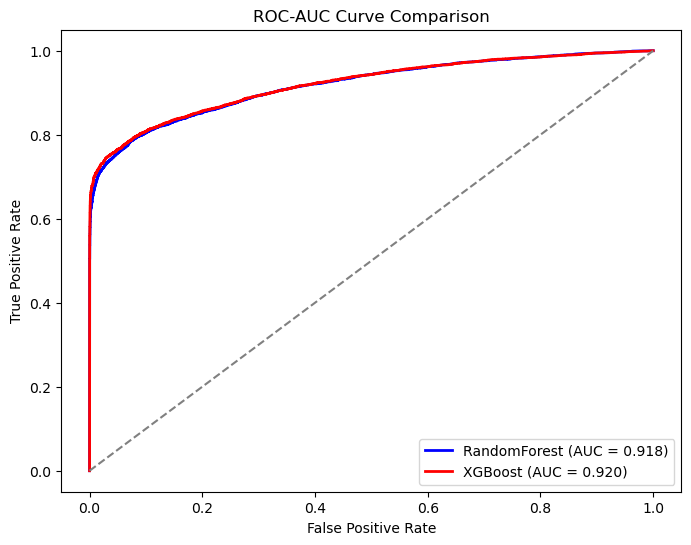

In [32]:
# ---- RandomForest ROC-AUC ----
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]   # Probabilities for class 1
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# ---- XGBoost ROC-AUC ----
y_prob_xgb = best_model.predict_proba(X_test)[:, 1]   # Replace best_xgb with your tuned model variable
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# ---- Plot ----
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f"RandomForest (AUC = {roc_auc_rf:.3f})")
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f"XGBoost (AUC = {roc_auc_xgb:.3f})")

# Random guess line
plt.plot([0,1], [0,1], color='grey', linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


## Best Random Forest


Training + Prediction time: 9.43 seconds

Accuracy on Test Set: 0.8534

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      7511
           1       0.94      0.75      0.84      7511

    accuracy                           0.85     15022
   macro avg       0.87      0.85      0.85     15022
weighted avg       0.87      0.85      0.85     15022



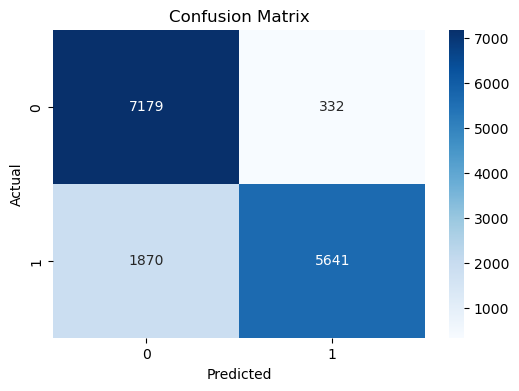

✅ Model and threshold configuration saved together!


In [35]:
import joblib
best_rf = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=15,
    bootstrap=False,
    random_state=42
)

start_time = time.time()
best_rf.fit(X_train, y_train)
end_time = time.time()

print(f"\nTraining + Prediction time: {end_time - start_time:.2f} seconds")

y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)
print(f"\nAccuracy on Test Set: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

joblib.dump(best_rf, 'best_rf.joblib')
print("✅ Model and threshold configuration saved together!")


In [ ]:
!pip install --upgrade xgboost


In [ ]:
import xgboost as xgb
print(xgb.__version__)


In [ ]:
conda update scikit-learn
